In [220]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [221]:
content  = pd.read_csv( 'C:/Users/heyangm/Desktop/nlp_lesson/data/titanic/train.csv')

In [222]:
content = content.dropna()

In [223]:
age_with_fares = content[(content['Age']>22)&(content['Fare']<400)&(content['Fare']>130)]

In [224]:
sub_fare = age_with_fares['Fare']

sub_age = age_with_fares['Age']

# Define model

In [225]:
def func(age, k, b):
    return k * age + b

# Define loss function

In [226]:
def loss(y, yhat):

    """
    :param y: the real fares

    :param yhat: the estimated fares

    :return: how good is the estimated fares

    """
    return np.mean(np.abs(y - yhat))

    # return np.mean(np.square(y - yhat))

    # return np.mean(np.sqrt(y - yhat))

# Random Choose Method to get optimal k and b

In [227]:
losses = []

In [243]:
min_error_rate = float('inf')

In [244]:
loop_times = 10000

In [245]:
change_directions = [
    # (k, b)
    (+1, -1), # k increase, b decrease

    (+1, +1),

    (-1, +1),

    (-1, -1)  # k decrease, b decrease
]

loop == 10000
f(age) = 8.096501068646997 * age + -3.158488545440072, with error rate: 137.30587741378062
loop == 9999
f(age) = 1.9460916956589323 * age + -3.7678088193297636, with error rate: 119.57637789001043
loop == 9990
f(age) = 4.2689754647283 * age + 4.394124261445873, with error rate: 62.86373265013007
loop == 9830
f(age) = 3.7980096723798518 * age + 8.953288330533336, with error rate: 61.41878493317417
loop == 9470
f(age) = 3.9658298796177345 * age + 7.612701310014359, with error rate: 61.32835473274682
loop == 8912
f(age) = 3.8386144780602134 * age + 9.790354558193517, with error rate: 61.19877226460489
loop == 8132
f(age) = 3.8762192536790074 * age + 9.58550925364645, with error rate: 61.167781901122765


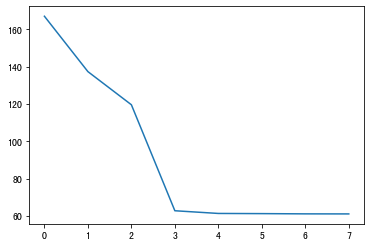

In [246]:
while loop_times > 0: 
    k_hat = random.random() * 20 - 10
    b_hat = random.random() * 20 - 10

    new_k = k_hat
    new_b = b_hat

    estimated_fares = func(sub_age, new_k, new_b)

    error_rate = loss(sub_fare, estimated_fares)

    if error_rate < min_error_rate:

        min_error_rate = error_rate

        best_k, best_b = new_k, new_b

        print('loop == {}'.format(loop_times))

        print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))

        losses.append(error_rate)
    loop_times -= 1

plt.plot(range(len(losses)), losses)

plt.show()

# Supervised Direction to get optimal k and b

In [247]:
change_directions = [(-1,-1),(-1,1),(1,-1),(1,1)]
direction = random.choice(change_directions)

In [248]:
def step():
    return random.random() * 1

In [249]:
min_error_rate = float('inf')

In [250]:
losses = []

In [251]:
loop_times = 10000

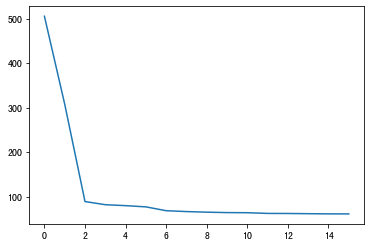

In [257]:
while loop_times > 0:
    k_change_direction, b_change_direction = direction # k，b减少方向
    
    k_star = random.random() * 20 - 10
    b_star = random.random() * 20 - 10
    
    k_new = k_star + k_change_direction * step() * learning_rate
    b_new = b_star + b_change_direction * step() * learning_rate
    
    estimated_fares = func(sub_age, k_new, b_new)
    error_rate = loss(sub_fare, estimated_fares)
    
    if error_rate < min_error_rate:
        min_error_rate = error_rate
        k_best = k_new
        b_best = b_new
        
        print('loop == {}'.format(loop_times)) 
        print('f(age) = {} * age + {}, with error rate: {}'.format(k_best, b_best, error_rate))
        
        losses.append(error_rate)
        
    else:
        direction = random.choice(list(set(change_directions) - {(k_change_direction, b_change_direction)}))
    loop_times -= 1

plt.plot(range(len(losses)), losses)
plt.show()

# Gradient Descent to get optimal k and b

In [258]:
def derivate_k(y, yhat, x):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -x_i for a, x_i in zip(abs_values, x)])

In [259]:
def derivate_b(y, yhat):
    abs_values = [1 if (y_i - yhat_i) > 0 else -1 for y_i, yhat_i in zip(y, yhat)]
    return np.mean([a * -1 for a in abs_values])

In [260]:
min_error_rate = float('inf')

loop_times = 10000

losses = []

In [261]:
change_directions = [
    # (k, b)
    (+1, -1), # k increase, b decrease
    (+1, +1),
    (-1, +1),
    (-1, -1)  # k decrease, b decrease
]

In [263]:
k_hat = random.random() * 20 - 10
b_hat = random.random() * 20 - 10

In [264]:
best_k, best_b = k_hat, b_hat

In [265]:
direction = random.choice(change_directions)

In [266]:
learing_rate = 1e-1

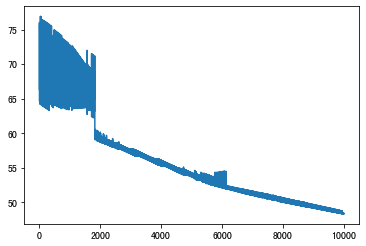

In [269]:
while loop_times > 0:

    k_delta = -1 * learing_rate * derivate_k(sub_fare, func(sub_age, k_hat, b_hat), sub_age)
    b_delta = -1 * learing_rate * derivate_b(sub_fare, func(sub_age, k_hat, b_hat))
    
    k_hat += k_delta
    b_hat += b_delta
    
    estimated_fares = func(sub_age, k_hat, b_hat)
    error_rate = loss(y=sub_fare, yhat=estimated_fares)
    
    print('loop == {}'.format(loop_times))
    print('f(age) = {} * age + {}, with error rate: {}'.format(best_k, best_b, error_rate))
    
    losses.append(error_rate)
    loop_times -= 1

plt.plot(range(len(losses)), losses)
plt.show()